In [89]:
import time
import matplotlib
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format= "svg"

In [90]:
repo_db = pd.read_csv('repoDB_Stars.csv')
#issue_db = pd.read_csv('issueDB.csv')

In [91]:
conference_count = {}
year_count = {}
for index, paper in repo_db.iterrows():
    conference = paper['Conference_Paper']
    year = paper['Year_Paper']
    if conference in conference_count:
        conference_count[conference] += 1
    else:
        conference_count[conference] = 1
    if year in year_count:
        year_count[year] += 1
    else:
        year_count[year] = 1

In [92]:
print("Statistics of the repoDB")
print(f"Number of repos: {len(repo_db)}")

Statistics of the repoDB
Number of repos: 537


Distribution of conference: 
{'cvpr': 129, 'iclr': 109, 'icml': 42, 'neurips': 69, 'eccv': 33, 'iccv': 75, 'aaai': 5, 'acl': 75}


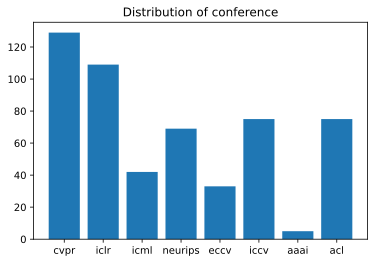

In [93]:
print(f"Distribution of conference: \n{conference_count}")
plt.bar(conference_count.keys(), conference_count.values())
plt.title("Distribution of conference")
plt.show()

Distribution of publication year: 
{2013: 2, 2014: 8, 2015: 16, 2016: 26, 2017: 70, 2018: 119, 2019: 90, 2020: 76, 2021: 71, 2022: 59}


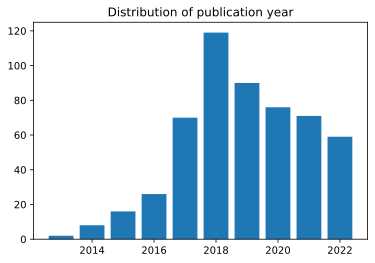

In [94]:
year_count = {k: v for k, v in sorted(year_count.items(), key=lambda item: item[0])}
print(f"Distribution of publication year: \n{year_count}")
plt.bar(year_count.keys(), year_count.values())
plt.title("Distribution of publication year")
plt.show()

Distribution of stars:
count      537.000000
mean       435.364991
std       2146.117781
min          0.000000
25%         17.000000
50%         52.000000
75%        204.000000
max      26264.000000
Name: Num_Star, dtype: float64


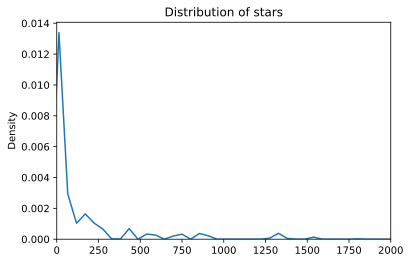

In [95]:
print(f"Distribution of stars:")
print(f"{repo_db['Num_Star'].describe()}")
graph = repo_db['Num_Star'].plot.kde(bw_method=0.001)
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0.,right=2000)
plt.title("Distribution of stars")
plt.show()

In [96]:
print(f"Distribution of forks:")
print(f"{repo_db['Num_Fork'].describe()}")
graph = repo_db['Num_Fork'].plot.kde()
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0.)
plt.title("Distribution of forks")
plt.show()

Distribution of forks:


KeyError: 'Num_Fork'

In [ ]:
print(f"Distribution of watchers:")
print(f"{repo_db['Num_Watcher'].describe()}")
graph = repo_db['Num_Watcher'].plot.kde()
graph.set_ylim(bottom=0.)
graph.set_xlim(left=0.)
plt.title("Distribution of watchers")
plt.show()